In [1]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
import numpy as np
from numpy import genfromtxt
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = np.genfromtxt('recordings.csv', delimiter='', skip_header=1)
print(data)

# We skip the 1st row because it's a time scale. 10 rows and 1680 columns

[[-1.47367978 -1.67672016 -0.83439495 ..., -0.7151825   0.03493466
  -0.46934224]
 [-1.61186671 -0.5456373   0.47400006 ..., -2.45522292 -2.16686584
  -1.65813669]
 [-1.40392196 -0.59200007  0.72118049 ..., -2.62943368 -2.2307648
  -1.81122419]
 ..., 
 [-0.71366519  0.4014686   1.19174225 ..., -1.90109653 -1.85360853
  -1.18943825]
 [-0.58693809 -1.08675424  0.66937209 ..., -1.70152069 -0.45942448
  -1.26655446]
 [-0.49765475 -1.28967476  1.13108469 ..., -2.73788571 -0.93220657
  -2.07921242]]


/anaconda/envs/py36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Perform factor analysis. We start with a random number of components, because it's hard to 
# know beforehand the right number of factors in the data. So here I'll start with 10

fa = FactorAnalysis(n_components=10, random_state=101)
factors = fa.fit(data).components_

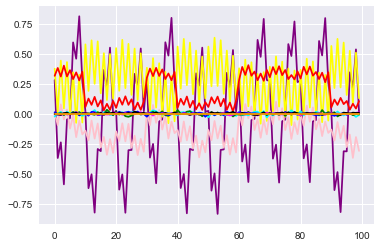

In [3]:
# Plot the extracted factors
plt.plot(factors[0][:100], "purple")
plt.plot(factors[1][:100], "yellow")
plt.plot(factors[2][:100], "red")
plt.plot(factors[3][:100], "Pink")
plt.plot(factors[4][:100], "cyan")
plt.plot(factors[5][:100], "green")
plt.plot(factors[6][:100], "blue")
plt.plot(factors[7][:100], "magenta")
plt.plot(factors[8][:100], "black")
plt.plot(factors[9][:100], "orange")

It seems that the main factors of the data are maximally 4, indexed [0-3] "purple", "yellow", "red" and "pink". Above that number [5-9] the factors don't seem to have much variance and they overlap in the plot above. So if we just plot the factors with the most variance[0-3], we should see the same trend. 


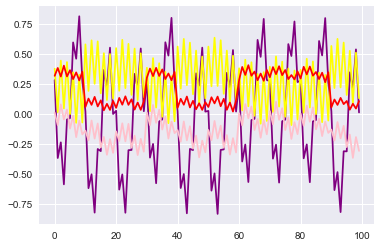

In [15]:
# Plot the extracted factors that retain the most variance in the data
plt.plot(factors[0][:100], "purple")
plt.plot(factors[1][:100], "yellow")
plt.plot(factors[2][:100], "red")
plt.plot(factors[3][:100], "Pink")

#### Which factor do you think is the hidden signal?

The hidden signal must lie within the first 4 factors. I expect the hiddgen message to have a meaningful pattern, which means that the factor should not have too much variance or too little. The 4th factor[3]"pink" doesn't seem to have a meaningful pattarn. So I suspect the hidden signal to be in one of the first 3 factors[0-2]. And if I have to make a guess before decoding the signal I would think that the hidden signal lies in the 3rd factor[2] in red as it looks binary. 


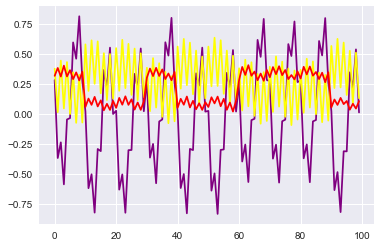

In [5]:
# Bonus: Find a way to encode the signal to restore the message string.

# factors with suspected hidden message:
plt.plot(factors[0][:100], "purple")
plt.plot(factors[1][:100], "yellow")
plt.plot(factors[2][:100], "red")

These three factors seem to have enough variance and show a pattern. So let's start with the red signal in the 3rd factor[2], because it looks binary. 

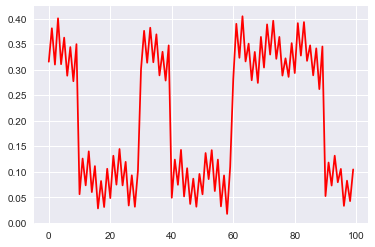

In [14]:
plt.plot(factors[2][:100], "red")

In [7]:
# Restore the message string from the red signal (3rd factor[2])

F = factors[2]

# Looking at the signal, we can see that the lenght of a bit is 10
F = F.reshape(int(len(F)/10), 10) # creating an array with bits as signal

# Normalize the data so we get 0 and 1
mean_F = np.mean(F,axis=1) # get the mean of each array
threshold = np.mean(F) # look at first 100 signals and create the mean for the threshold
binarySignal = (mean_F < threshold).astype(int) # create binary signal

# Text is ususally encoded in 8 bit signals (1 byte)
byteSignal = binarySignal.reshape(int(len(binarySignal)/8),8)

hiddenText = ""
for a in byteSignal: # go through each byte and transform it into a letter
    binary_string = "".join(map(str, a)) # transform byte to binary string
    asciiInt = int(binary_string, 2) # convert binary string to ascii integer (decimal)
    letter = chr(asciiInt) # ascii Int to Letter (char)
    hiddenText = hiddenText + letter
    
print(hiddenText)

     long and prosper


From the exercise description we know that we're in the realm of Star Trek, therefore the correct answer must be
"Live long and prosper". 
I tried already to encode the yellow signal as it's similar to the red signal in someways but that didn't yeild any meaningful message or charecters. 

Alternativley I will use the 1st factor[0] "purple" to restore the message. Because the length of the bit in the purple signal is 10, same as the red signal. 

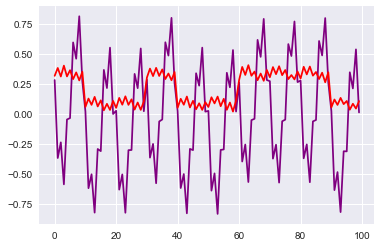

In [8]:
plt.plot(factors[0][:100], "purple")
plt.plot(factors[2][:100], "red")

In [9]:
# Restore the message string from the purple signal (1st factor[0])

F = factors[0]

# Looking at the signal, we can see that the lenght of a bit is 10
F = F.reshape(int(len(F)/10), 10) # creating an array with bits as signal

# Normalize the data so we get 0 and 1
mean_F = np.mean(F,axis=1) # get the mean of each array
threshold = np.mean(F) # look at first 100 signals and create the mean for the threshold
binarySignal = (mean_F < threshold).astype(int) # create binary signal

# Text is ususally encoded in 8 bit signals (1 byte)
byteSignal = binarySignal.reshape(int(len(binarySignal)/8),8)

hiddenText = ""
for a in byteSignal: # go through each byte and transform it into a letter
    binary_string = "".join(map(str, a)) # transform byte to binary string
    asciiInt = int(binary_string, 2) # convert binary string to ascii integer (decimal)
    letter = chr(asciiInt) # ascii Int to Letter (char)
    hiddenText = hiddenText + letter
    
print(hiddenText)

live long and prosper
